In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
import sympy as sm
from scipy.integrate import ode,odeint

In [2]:
sm.init_printing()
mpl.rcParams['agg.path.chunksize'] = 10000
seaborn.set_context("talk")

# Πρόβλημα 3 Σωμάτων 

## Hamiltonian 

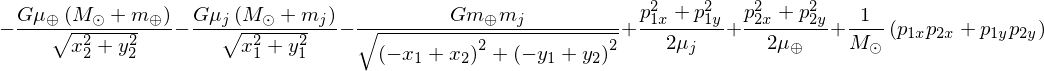

In [67]:
m1,m2,mu1,mu2,M=sm.symbols('m_j,m_\oplus,\mu_j,\mu_\oplus, M_\odot', real=True, positive=True)
x1,y1,x2,y2,p1x,p1y,p2x,p2y,p1,p2,r1,r2=sm.symbols('x_1,y_1,x_2,y_2,p_{1x},p_{1y},p_{2x},p_{2y},p_1,p_2,r_1,r_2',real=True, positive=True)
a1,a2,e1,e2=sm.symbols('a_1,a_2,e_1,e_2', real=True, positive=True)
x10,x20,y10,y20,p1x0,p1y0,p2x0,p2y0=sm.symbols('x_{10},x_{20},y_{10},y_{20},p_{1x0},p_{1y0},p_{2x0},p_{2y0}', real=True, positive=True)
W=sm.symbols('\Omega')
G,D=sm.symbols('G,\Delta', real=True, positive=True)
#M=1.
p1=sm.sqrt(p1x**2+p1y**2)
p2=sm.sqrt(p2x**2+p2y**2)

r1=sm.sqrt(x1**2+y1**2)
r2=sm.sqrt(x2**2+y2**2)
pp=p1x*p2x+p1y*p2y

D=sm.sqrt((y2-y1)**2+(x2-x1)**2)

H1=p1**2/(2*mu1)-G*(M+m1)*mu1/r1
H2=p2**2/(2*mu2)-G*(M+m2)*mu2/r2
H3=-G*m1*m2/D + pp/M

H=H1+H2+H3
H
#H1

## Εξισώσεις κινησεις
$$
\dot{x}_1,\dot{y}_1,\dot{x}_2,\dot{y}_2,\dot{p}_{x1},\dot{p}_{y1},\dot{p}_{x2},\dot{p}_{y2}
$$

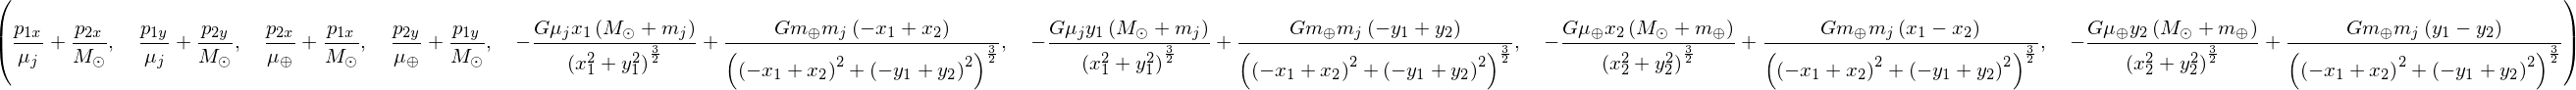

In [11]:
dotx1=H.diff(p1x)
doty1=H.diff(p1y)
dotx2=H.diff(p2x)
doty2=H.diff(p2y)

dotpx1=-H.diff(x1)
dotpy1=-H.diff(y1)

dotpx2=-H.diff(x2)
dotpy2=-H.diff(y2)
dotx1,doty1,dotx2,doty2,dotpx1,dotpy1,dotpx2,dotpy2

In [68]:
Gn=4.*np.pi**2
m1n=1./1047. #0.01
m2n=3.0e-6 #0.005
Mn=1.
a1n=5.20260
a2n=1.000001018
e1n=0.048498
e2n=0.0167086
apj=273.867
ape=114.207
Wn=(apj-ape)*np.pi/180.
#Wn=np.pi/2.
mu1n=m1n*Mn/(Mn+m1n)
mu2n=m2n*Mn/(Mn+m2n)
sub={mu1:mu1n,mu2:mu2n,G:Gn,m1:m1n,m2:m2n,M:Mn,a1:a1n,a2:a2n,e1:e1n,e2:e2n,W:Wn}

In [13]:
dx1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotx1.subs(sub),"numpy")
dx2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotx2.subs(sub),"numpy")
dy1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),doty1.subs(sub),"numpy")
dy2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),doty2.subs(sub),"numpy")
dpx1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpx1.subs(sub),"numpy")
dpx2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpx2.subs(sub),"numpy")
dpy1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpy1.subs(sub),"numpy")
dpy2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpy2.subs(sub),"numpy")
def dY(y,t):
    a= np.array([
            dx1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dx2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dy1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dy2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpx1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpx2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpy1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpy2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7])
        ])
    return a

## Αρχικές συνθήκες
$$
x_{10},y_{10},x_{20},y_{20},p_{x10},p_{y10},p_{x20},p_{y20}
$$

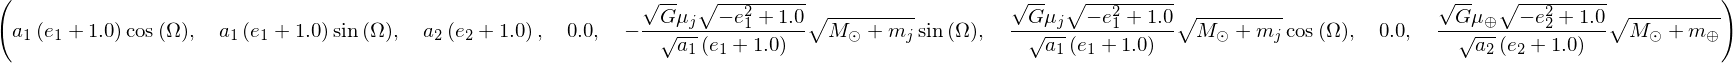

In [14]:
x10=a1*(1.+e1)*sm.cos(W)
y10=a1*(1.+e1)*sm.sin(W)
x20=a2*(1.+e2)
y20=sm.Float(0)

p1vec =mu1*sm.sqrt(G*(M+m1)*a1*(1.-e1**2))/(a1*(1.+e1))
p1x0=-p1vec*sm.sin(sm.pi-W)
p1y0=-p1vec*sm.cos(sm.pi-W)
p2x0=sm.Float(0)
p2y0=mu2*sm.sqrt(G*(M+m2)*a2*(1.-e2**2))/(a2*(1.+e2))

x10,y10,x20,y20,p1x0,p1y0,p2x0,p2y0

# Numerical Values

In [15]:
Y0=np.array([x10.subs(sub),
             x20.subs(sub),
             y10.subs(sub),
             y20.subs(sub),
             p1x0.subs(sub),
             p2x0.subs(sub),
             p1y0.subs(sub),
             p2y0.subs(sub)
            ]).astype('float')
Y0

array([ -5.11478261e+00,   1.01670964e+00,   1.89607598e+00,
         0.00000000e+00,  -8.70771912e-04,   0.00000000e+00,
        -2.34896126e-03,   1.85371568e-05])

In [65]:
x1t,x2t,y1t,y2t,px1t,px2t,py1t,py2t = np.load('outdatasec.npy')

In [20]:
ten=1216

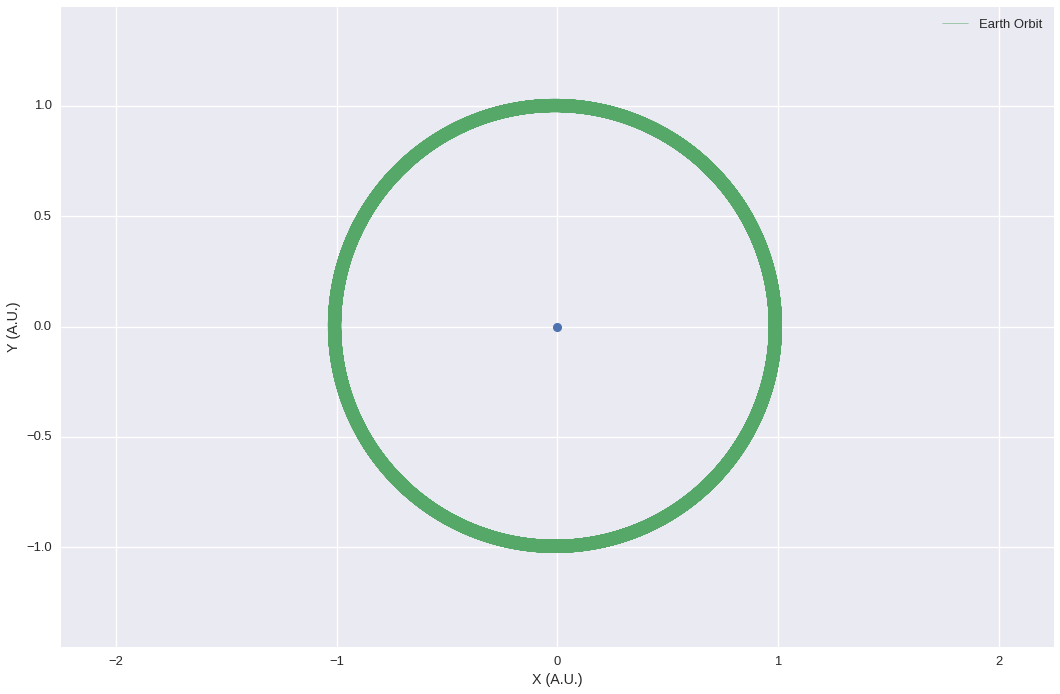

In [22]:
lw=0.5#1./np.log(x1t.shape[0])
plt.figure(figsize=(15,10))
plt.plot([0],[0],'o')
plt.axis('equal')
#plt.plot(x1t,y1t,linewidth=lw,label='Jupiter Orbit')
plt.plot(x2t[::ten],y2t[::ten],linewidth=lw,label='Earth Orbit')
plt.xlabel('X (A.U.)')
plt.ylabel('Y (A.U.)')
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('orbits_e.png')

In [69]:
Energy=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),H.subs(sub),"numpy")
Energy1=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),H1.subs(sub),"numpy")
Energy2=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),H2.subs(sub),"numpy")
Et=Energy(x1t,x2t,y1t,y2t,px1t,px2t,py1t,py2t)
E1t=Energy1(x1t,x2t,y1t,y2t,px1t,px2t,py1t,py2t)
E2t=Energy2(x1t,x2t,y1t,y2t,px1t,px2t,py1t,py2t)

In [755]:
Et[-1]-Et[0]

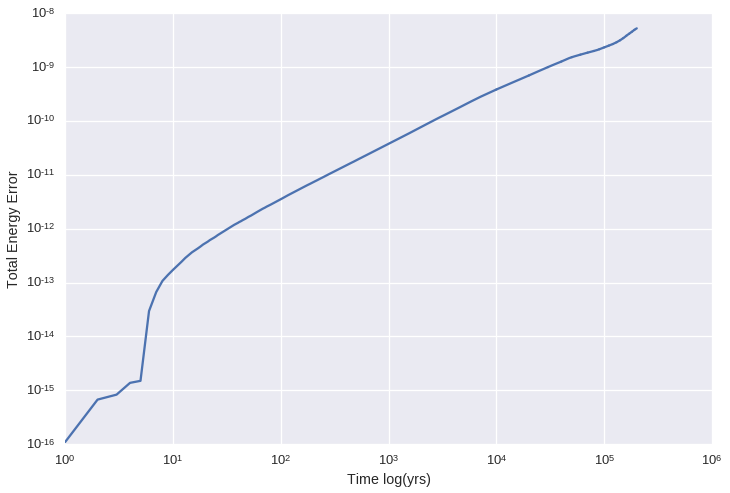

In [20]:
plt.loglog(t[::122],np.abs(Et-Et[0])[::122])
plt.xlabel('Time log(yrs)')
plt.ylabel('Total Energy Error')
plt.tight_layout()
plt.savefig('error3bp.png')
#plt.yscale('log')

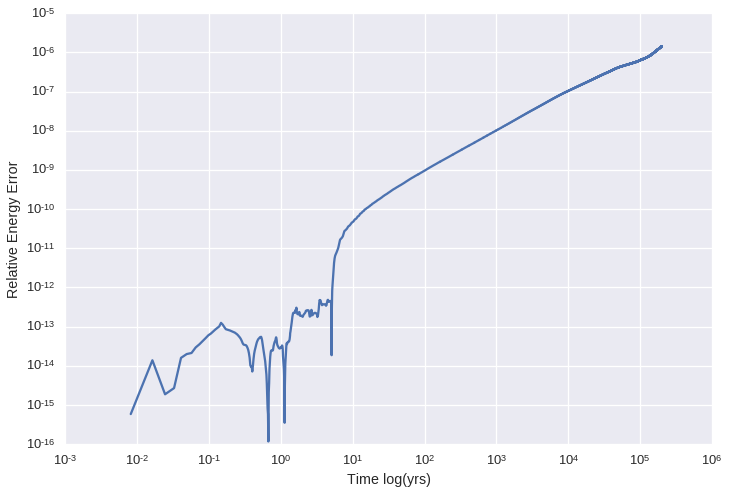

In [757]:
plt.loglog(t,np.abs(Et-Et[0])/np.abs(Et[0]))
plt.xlabel('Time log(yrs)')
plt.ylabel('Relative Energy Error')
plt.tight_layout()
plt.savefig('rerror.png')
#plt.yscale('log')

In [70]:
#a1t=-Gn*(Mn+m1n)*mu1n/((px1**2+py1**2)/mu1n-(Gn*(Mn+m1n)*mu1n)/(2.*np.sqrt(x1**2 +y1**2)))
#a2t=-Gn*(Mn+m2n)*mu2n/((px2**2+py2**2)/mu2n-(Gn*(Mn+m2n)*mu2n)/(2.*np.sqrt(x2**2 +y2**2)))
a1t=-Gn*(Mn+m1n)*mu1n/(2.*E1t)
G1=x1t*py1t-y1t*px1t
e1t=np.sqrt(1.-G1**2/(mu1n**2 *Gn*(Mn+m1n)*a1t))

a2t=-Gn*(Mn+m2n)*mu2n/(2.*E2t)
G2=x2t*py2t-y2t*px2t
e2t=np.sqrt(1.-G2**2/(mu2n**2 *Gn*(Mn+m2n)*a2t))

In [71]:
np.save('outdataecc',e2t)
np.save('outdataeccj',e1t)

In [ ]:
plt.plot(t,a1t,linewidth=lw,label=u'Μεγάλος Ημιάξονας Δια')
plt.xlabel('Time (yrs)')
plt.ylabel(u'Μεγάλος Ημιάξονας (A.U.)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('a.png')

In [ ]:
plt.plot(t,a2t,linewidth=0.5,label=u'Μεγάλος Ημιάξονας Γης')
plt.xlabel('Time (yrs)')
plt.ylabel(u'Μεγάλος Ημιάξονας (A.U.)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('a.png')

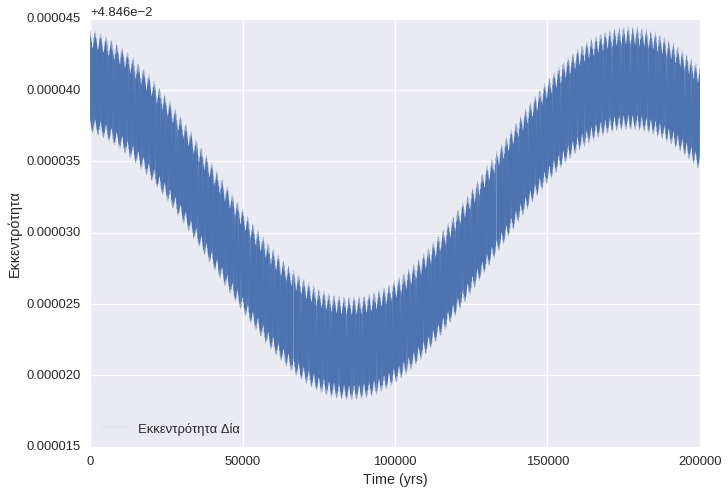

In [22]:
plt.plot(t[::1216],e1t[::1216],label=u'Εκκεντρότητα Δία',linewidth=0.1)
plt.xlabel('Time (yrs)')
plt.ylabel(u'Εκκεντρότητα')
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('ej.png')

In [20]:
e2t.shape,t.shape

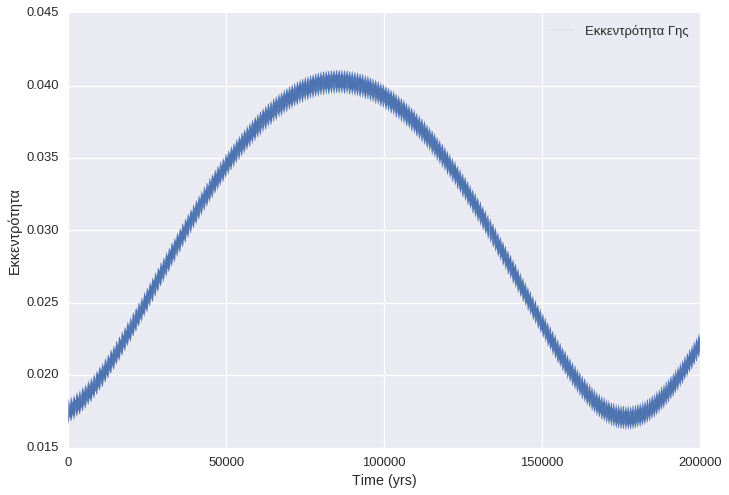

In [23]:
plt.plot(t[::1216],e2t[::1216],label=u'Εκκεντρότητα Γης',linewidth=0.1)
plt.xlabel('Time (yrs)')
plt.ylabel(u'Εκκεντρότητα')
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('ee.png')

# Restricted 3Body Problem
---

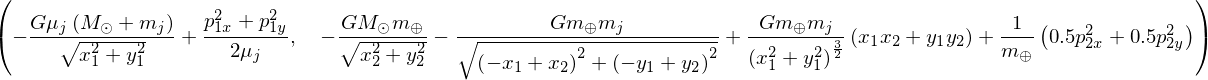

In [11]:
p1=sm.sqrt(p1x**2+p1y**2)
p2=sm.sqrt(p2x**2+p2y**2)

r1=sm.sqrt(x1**2+y1**2)
r2=sm.sqrt(x2**2+y2**2)

D=sm.sqrt((y2-y1)**2+(x2-x1)**2)

H1r=p1**2/(2*mu1)-G*(M+m1)*mu1/r1
#H1r=p1**2/(2*mu1)-mu1/r1
H2r=p2**2/2-(1-mu1)/r2-mu1/D+mu1*(x1*x2+y1*y2)/r1**3
H2r=p2**2/(2.*m2)-(G*M*m2)/r2-G*m1*m2/D+G*m1*m2*(x1*x2+y1*y2)/r1**3
Hr=H2r
H1r,H2r

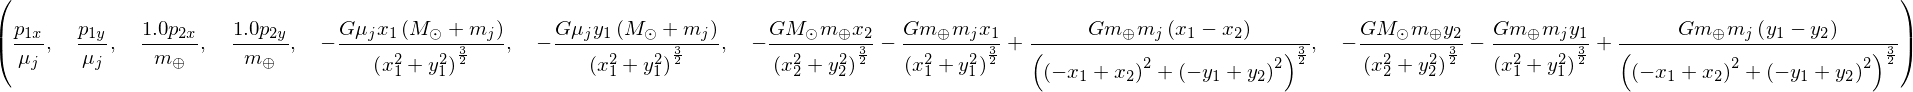

In [26]:
dotx1r=H1r.diff(p1x)
doty1r=H1r.diff(p1y)
dotx2r=H2r.diff(p2x)
doty2r=H2r.diff(p2y)

dotpx1r=-H1r.diff(x1)
dotpy1r=-H1r.diff(y1)

dotpx2r=-H2r.diff(x2)
dotpy2r=-H2r.diff(y2)
dotx1r,doty1r,dotx2r,doty2r,dotpx1r,dotpy1r,dotpx2r,dotpy2r

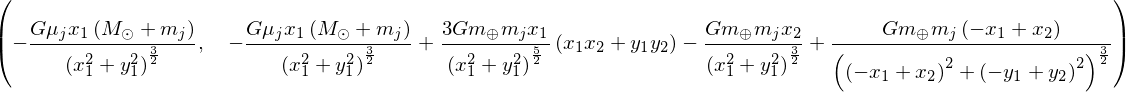

In [27]:
-(H1r).diff(x1),-(H1r+H2r).diff(x1)

In [13]:
Gn=4.*np.pi**2
m1n=1./1047. #0.01
m2n=3.0e-6 #0.005
Mn=1.
a1n=5.20260
a2n=1.000001018
e1n=0.048498
e2n=0.0167086
apj=273.867
ape=114.207
Wn=(apj-ape)*np.pi/180.
mu1n=m1n*Mn/(Mn+m1n)
mu2n=m2n*Mn/(Mn+m2n)
subr={mu1:mu1n,mu2:mu2n,G:Gn,m1:m1n,m2:m2n,M:Mn,a1:a1n,a2:a2n,e1:e1n,e2:e2n,W:Wn}

In [30]:
dx1r = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotx1r.subs(subr),"numpy")
dx2r = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotx2r.subs(subr),"numpy")
dy1r = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),doty1r.subs(subr),"numpy")
dy2r = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),doty2r.subs(subr),"numpy")
dpx1r = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpx1r.subs(subr),"numpy")
dpx2r = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpx2r.subs(subr),"numpy")
dpy1r = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpy1r.subs(subr),"numpy")
dpy2r = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpy2r.subs(subr),"numpy")
def dYr(y,t):
    a= np.array([
            dx1r(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dx2r(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dy1r(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dy2r(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpx1r(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpx2r(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpy1r(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpy2r(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7])
        ])
    return a

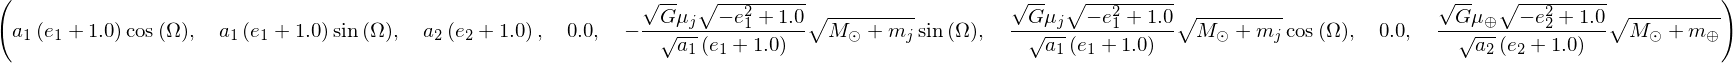

In [31]:
x10r=a1*(1.+e1)*sm.cos(W)
y10r=a1*(1.+e1)*sm.sin(W)
x20r=a2*(1.+e2)
y20r=sm.Float(0)

p1vec =mu1*sm.sqrt(G*(M+m1)*a1*(1.-e1**2))/(a1*(1.+e1))
p1x0r=-p1vec*sm.sin(sm.pi-W)
p1y0r=-p1vec*sm.cos(sm.pi-W)
p2x0r=sm.Float(0)
p2y0r=mu2*sm.sqrt(G*(M+m2)*a2*(1.-e2**2))/(a2*(1.+e2))

x10r,y10r,x20r,y20r,p1x0r,p1y0r,p2x0r,p2y0r

In [32]:
vel=sm.sqrt(G*(M+m2)*a2*(1.-e2**2))/(a2*(1.+e2))
vel.subs(subr)

In [33]:
Y0r=np.array([x10r.subs(subr),
             x20r.subs(subr),
             y10r.subs(subr),
             y20r.subs(subr),
             p1x0r.subs(subr),
             p2x0r.subs(subr),
             p1y0r.subs(subr),
             p2y0r.subs(subr)
             ]).astype('float')
Y0r

array([ -5.11478261e+00,   1.01670964e+00,   1.89607598e+00,
         0.00000000e+00,  -8.70771912e-04,   0.00000000e+00,
        -2.34896126e-03,   1.85371568e-05])

In [15]:
#np.save('outdatasec_r',[x1tr,x2tr,y1tr,y2tr,px1tr,px2tr,py1tr,py2tr])
x1tr,x2tr,y1tr,y2tr,px1tr,px2tr,py1tr,py2tr = np.load('outdatasec_r.npy')

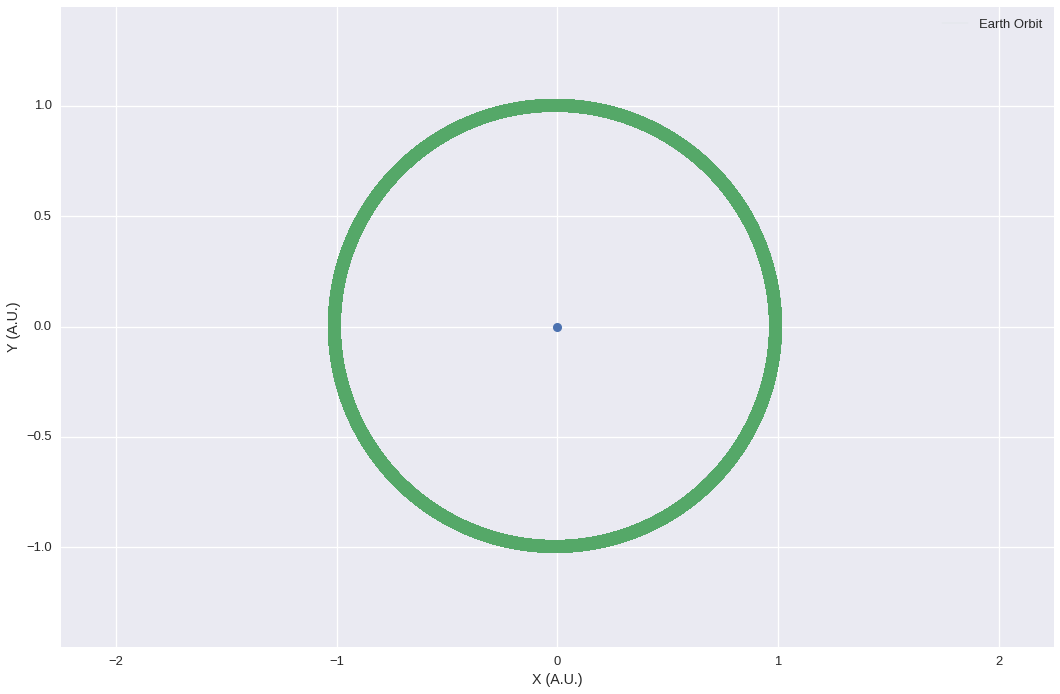

In [22]:
lw=0.05 #1./np.log(x1t.shape[0])
plt.figure(figsize=(15,10))
plt.plot([0],[0],'o')
plt.axis('equal')
#plt.plot(x1tr,y1tr,linewidth=lw,label='Jupiter Orbit')
plt.plot(x2tr,y2tr,linewidth=lw,label='Earth Orbit')
plt.xlabel('X (A.U.)')
plt.ylabel('Y (A.U.)')
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('earth_orbit_r.png')

In [16]:
Energyr=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),Hr.subs(subr),"numpy")
Energy1r=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),H1r.subs(subr),"numpy")
Energy2r=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),H2.subs(subr),"numpy")
Etr=Energyr(x1tr,x2tr,y1tr,y2tr,px1tr,px2tr,py1tr,py2tr)
E1tr=Energy1r(x1tr,x2tr,y1tr,y2tr,px1tr,px2tr,py1tr,py2tr)
E2tr=Energy2r(x1tr,x2tr,y1tr,y2tr,px1tr,px2tr,py1tr,py2tr)

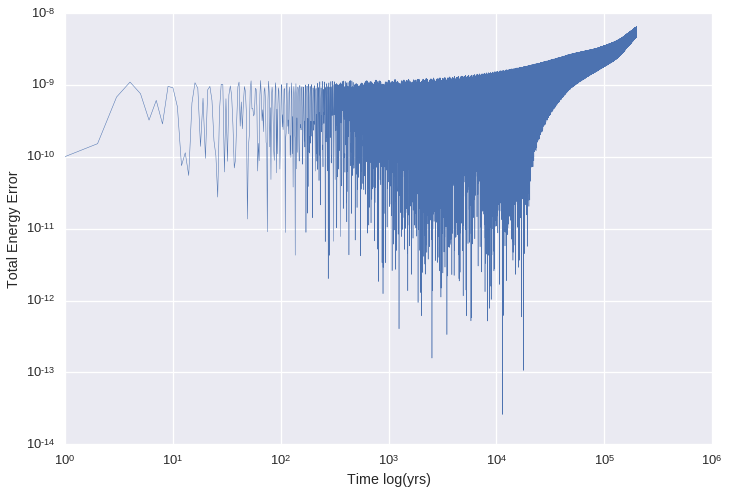

In [37]:
plt.loglog(t[::122],np.abs(E2tr-E2tr[0])[::122],linewidth=0.5)
plt.xlabel('Time log(yrs)')
plt.ylabel('Total Energy Error')
plt.tight_layout()
plt.savefig('error_r.png')
#plt.yscale('log')

In [17]:
a1tr=-Gn*(Mn+m1n)*mu1n/(2.*E1tr)
G1r=x1tr*py1tr-y1tr*px1tr
e1tr=np.sqrt(1.-G1r**2/(mu1n**2 *Gn*(Mn+m1n)*a1tr))
a2tr=-Gn*(Mn+m2n)*mu2n/(2.*E2tr)
G2r=x2tr*py2tr-y2tr*px2tr
e2tr=np.sqrt((1.-G2r**2/(mu2n**2 *Gn*(Mn+m2n)*a2tr)))

In [18]:
np.save('outdataecc_r',e2tr)

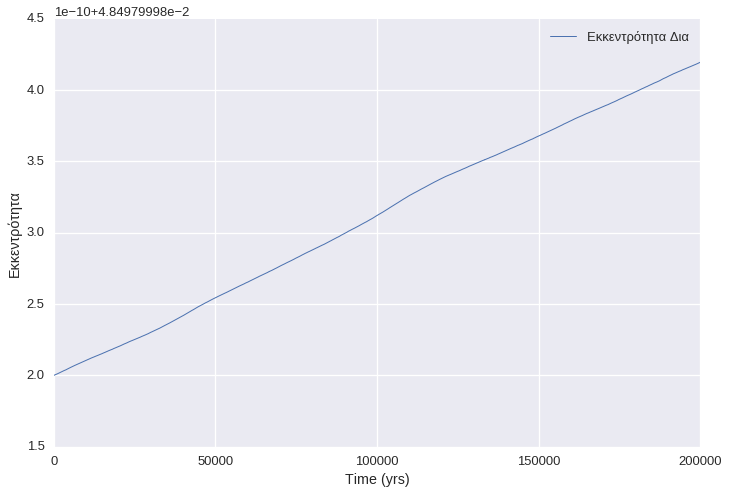

In [42]:
plt.plot(t[::1216],e1tr[::1216],label=u'Εκκεντρότητα Δια',linewidth=1.)
plt.xlabel('Time (yrs)')
plt.ylabel(u'Εκκεντρότητα')
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('ej_r.png')

In [38]:
e2tr.shape,e2t.shape,t.shape

NameError: name 't' is not defined

In [56]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [45]:
from scipy.stats import describe

In [47]:
describe(np.abs(e2tr-e2t))

In [44]:
np.mean(np.abs(e2tr-e2t))/e2n

In [3]:
import pandas as pd

In [4]:
e2t = np.load('outdataecc.npy')
e2tr = np.load('outdataecc_r.npy')
t=np.arange(0.,200000.,3./365.)

In [21]:
t[e2tr.argmin()]

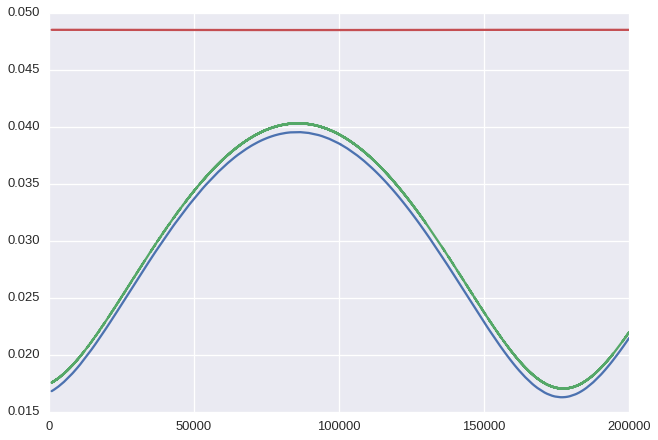

In [72]:
plt.plot(t[::1216][99:],moving_average(e2tr[::1216],100))
plt.plot(t[::1216][99:],moving_average(e2t[::1216],100))
plt.plot(t[::1216][99:],moving_average(e1t[::1216],100))

In [26]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [27]:
pos = np.abs(e2t[::1216]-e2tr[::1216])/e2tr[::1216]

In [47]:
pos.shape,moving_average(pos,100).shape,t[::1216][99:].shape

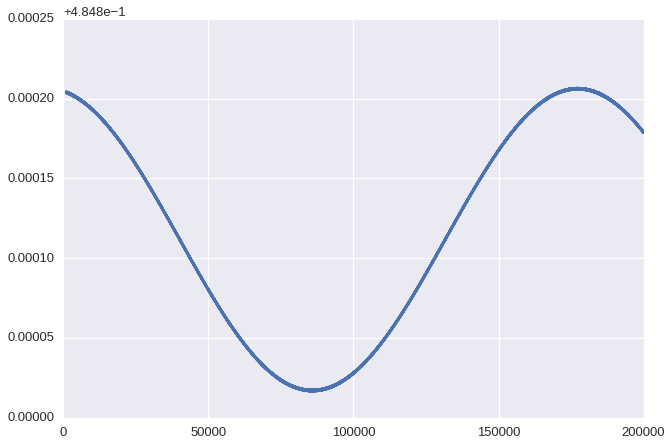

In [76]:
plt.plot(t[::1216][99:],10.*moving_average(e1t[::1216],100),label='Jupiter')

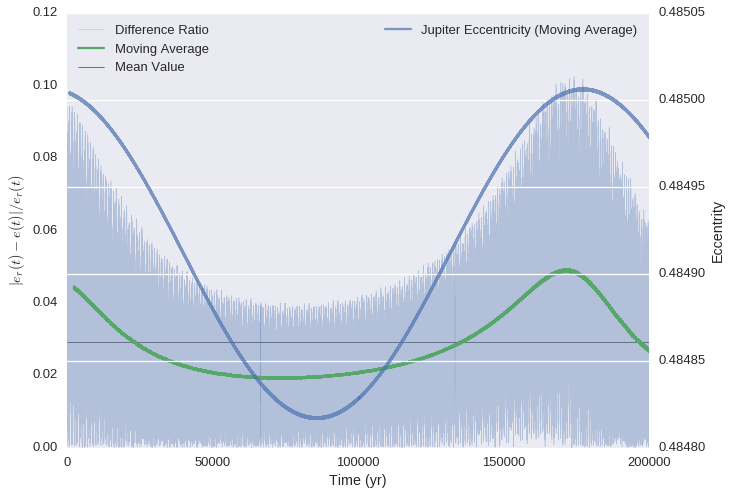

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[::1216],pos,label='Difference Ratio',linewidth=0.5,alpha=0.35)
ax.plot(t[::1216][249:],moving_average(pos,250),label='Moving Average')
ax.hlines(pos.mean(),0.,t.max(),linewidth=0.5,label='Mean Value')
ax2 = ax.twinx()
ax2.plot(t[::1216][99:],10.*moving_average(e1t[::1216],100),label='Jupiter Eccentricity (Moving Average)',alpha=0.7)
ax.legend(loc='best')
ax.grid()
ax.set_xlabel("Time (yr)")
ax.set_ylabel(r"$|e_r(t)-e(t)|/e_r(t)$")
ax2.set_ylabel("Eccentrity")
ax2.legend(loc='best')
ax2.get_yaxis().get_major_formatter().set_useOffset(False)
plt.tight_layout()
plt.savefig('diff.png')

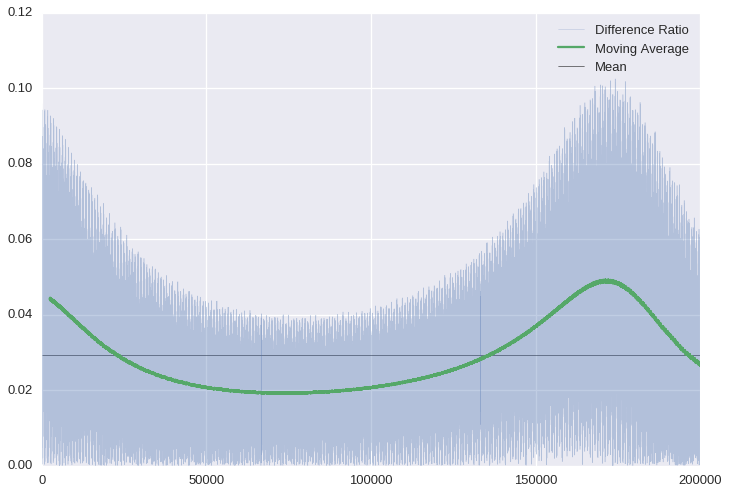

In [77]:
plt.plot(t[::1216],pos,label='Difference Ratio',linewidth=0.5,alpha=0.35)
plt.plot(t[::1216][249:],moving_average(pos,250),label='Moving Average')
plt.hlines(pos.mean(),0.,t.max(),linewidth=0.5,label='Mean')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('diff.png')

In [5]:
df = pd.DataFrame({'t':t,'e':e2t,'er':e2tr})
df = df.set_index('t')

In [10]:
df['dif']=np.abs(df['e']-df['er'])

In [22]:
a= pd.rolling_mean(df['dif'], 100000)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100000,center=False).mean()
  if __name__ == '__main__':


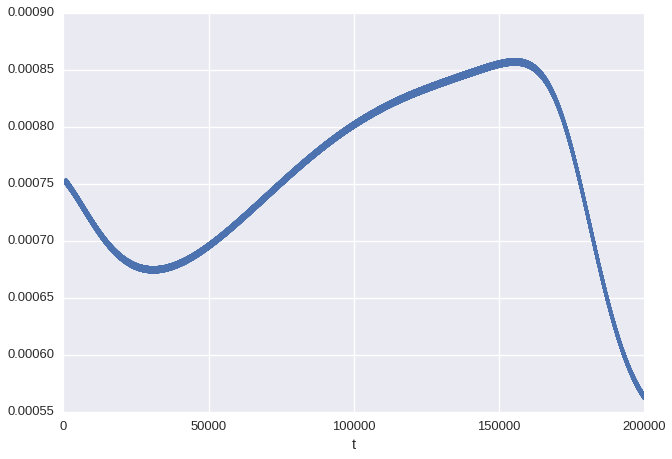

In [23]:
a.plot()

,e,er,t
0,0.016709,0.016709,0.000000
1,0.016716,0.016709,0.008219
2,0.016725,0.016710,0.016438
3,0.016735,0.016710,0.024658
4,0.016747,0.016711,0.032877
5,0.016760,0.016711,0.041096
6,0.016775,0.016712,0.049315
7,0.016791,0.016712,0.057534
8,0.016808,0.016713,0.065753
9,0.016826,0.016714,0.073973


ValueError: x and y must have same first dimension

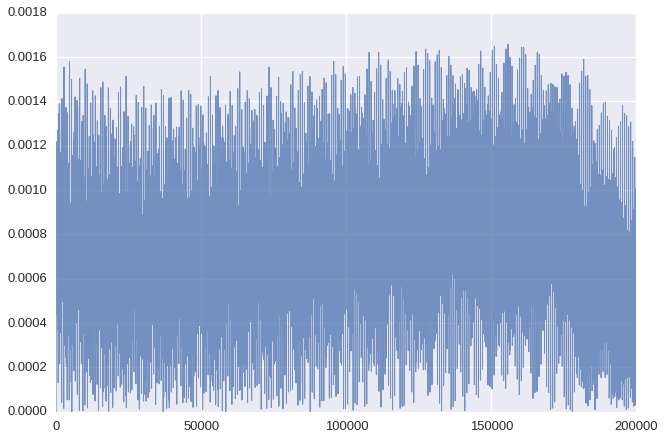

In [60]:
plt.plot(t[::1216*10],np.abs(e2tr-e2t)[::1216*10],linewidth=1,alpha=0.75)
x_av = movingaverage(t[::1216*10], 100)
plt.plot(x_av, np.abs(e2tr-e2t)[::1216*10])

plt.yscale('log')
plt.xlabel('Time (yrs)')
plt.ylabel(u'Εκκεντρότητα')
plt.tight_layout()
#plt.legend(loc='best')
plt.savefig('diff.png')